In [1]:
#Load 'Pandas' for manipulating dataframes.
#Load 'seaborn' and 'matplot' for data visualisation.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings

In [2]:
#Take a brief look at the data
Iris = pd.read_csv("Iris.csv")
Iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#let's describe the data
Iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Split the data into training and testing sets
X = Iris.drop('variety', axis=1)
y = Iris['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
# Make predictions
y_pred = knn.predict(X_test)
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



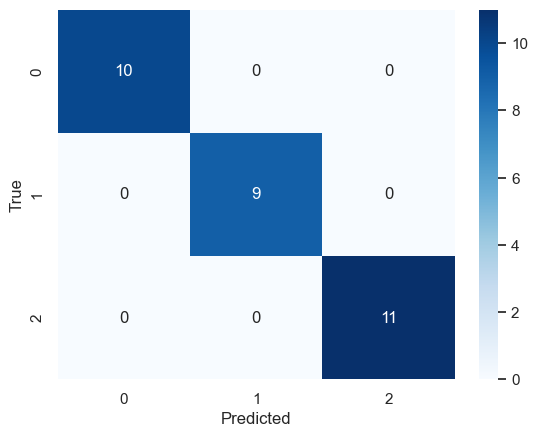

In [7]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<Axes: xlabel='sepal.length', ylabel='sepal.width'>

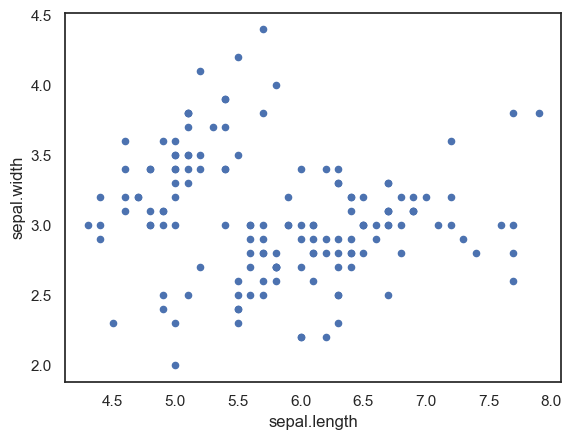

In [8]:
Iris.plot(kind="scatter", x="sepal.length", y="sepal.width")


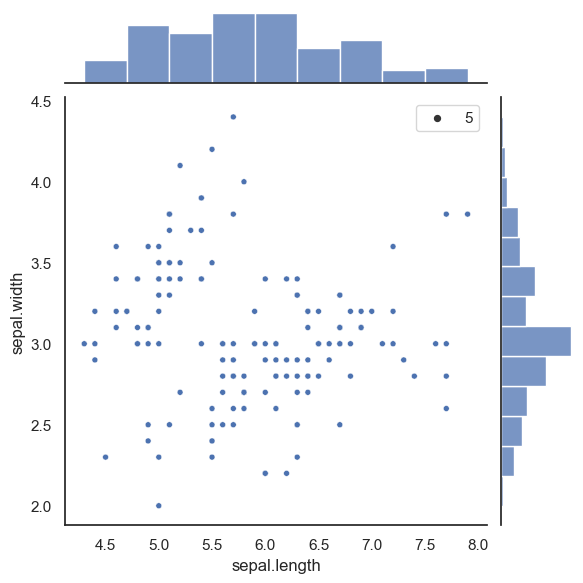

In [9]:
#Visulization of sepal lenghth and sepal width by seaborn
sns.jointplot(x="sepal.length", y="sepal.width", data=Iris, size=5)


<Axes: xlabel='variety', ylabel='petal.length'>

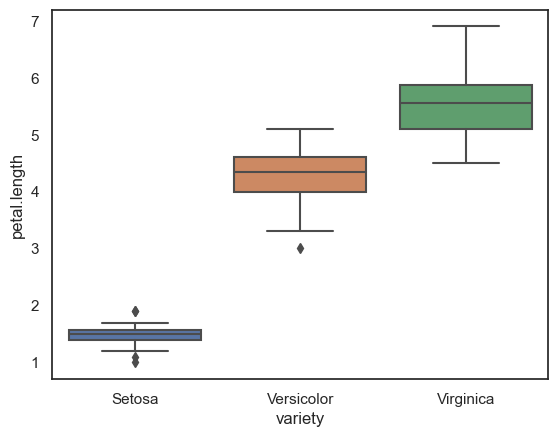

In [10]:
# seaborn visualization of different varieties
sns.boxplot(x="variety", y="petal.length", data=Iris)


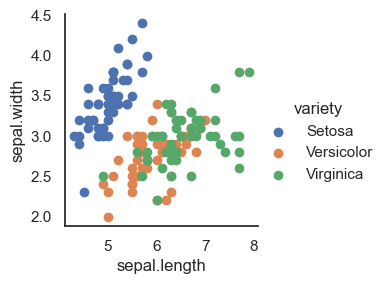

In [11]:
sns.FacetGrid(Iris, hue="variety") \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend()

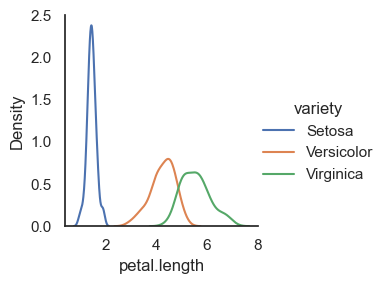

In [12]:
sns.FacetGrid(Iris, hue="variety") \
   .map(sns.kdeplot, "petal.length") \
   .add_legend()